In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dir = '/content/drive/MyDrive/livein/train'
test_dir = '/content/drive/MyDrive/livein/test'

# Image size and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load testing data from directories
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (plastic or no-plastic)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,  # Set to a higher number for better results
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


Found 1184 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 740s 18s/step - accuracy: 0.6579 - loss: 0.8468 - val_accuracy: 0.6010 - val_loss: 0.7982
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8571 - val_loss: 0.5170
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.7932 - loss: 0.4286 - val_accuracy: 0.6250 - val_loss: 0.8483
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8018
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.8439 - loss: 0.3637 - val_accuracy: 0.5673 - val_loss: 1.1189
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6429 - val_loss: 1.0296
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.8422 - loss: 0.3558 - val_accuracy: 0.6514 - val_loss: 0.9957
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5714 - val_loss: 0.8515
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9117 - loss: 0.2483 - 

In [3]:
model.save('plastic_detection_model.h5')

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dir = '/content/drive/MyDrive/livein/train'
test_dir = '/content/drive/MyDrive/livein/test'

# Image size and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load testing data from directories
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (plastic or no-plastic)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,  # Set to a higher number for better results
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

Found 1184 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.6264 - loss: 1.1626 - val_accuracy: 0.5096 - val_loss: 0.7691
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7143 - val_loss: 0.7211
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.7842 - loss: 0.4371 - val_accuracy: 0.6058 - val_loss: 1.1007
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5714 - val_loss: 1.1269
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.8288 - loss: 0.3815 - val_accuracy: 0.6683 - val_loss: 0.6503
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5714 - val_loss: 0.6867
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.8415 - loss: 0.3615 - val_accuracy: 0.6514 - val_loss: 0.8360
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0595
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.8704 - loss: 0.3035

In [12]:
model.save('plastic_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


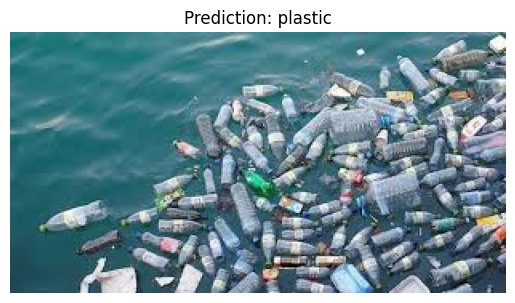

Email successfully sent!


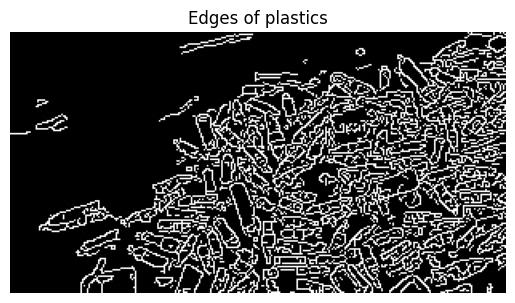

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import geocoder  # For getting geolocation data
import cv2  # OpenCV for image processing

# Load the trained model
model = tf.keras.models.load_model('/content/plastic_detection_model.h5')

# Function to predict if the image contains plastic or not
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Ensure it matches the model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict using the model
    prediction = model.predict(img_array)

    # Output the result
    if prediction[0][0] > 0.5:  # Assuming sigmoid activation for binary classification
        result = "plastic"
    else:
        result = "no-plastic"

    return result

# Function to get geolocation (latitude and longitude)
def get_geo_location():
    g = geocoder.ip('me')
    if g.ok:
        return g.latlng
    return None

# Function to send an email notification with attachment and geolocation
def send_email(prediction_result, img_path, edge_img_path=None):
    from_email = 'sixaxisstar@gmail.com'
    to_email = 'muthukumarg565@gmail.com'
    password = 'rfko cizl gxdx uyux'

    # Create the email content
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = f"Plastic Detection - {prediction_result.capitalize()} Found"

    # Get geolocation data
    geo_location = get_geo_location()
    if geo_location:
        latitude, longitude = geo_location
        location_info = f"\nLocation: Latitude: {latitude}, Longitude: {longitude}"
    else:
        location_info = "\nLocation: Unable to determine"

    # Add the prediction result and geolocation to the email body
    body = f"The prediction result for the provided image is: {prediction_result}.{location_info}"
    msg.attach(MIMEText(body, 'plain'))

    # Attach the original image to the email
    with open(img_path, 'rb') as f:
        mime = MIMEBase('image', 'jpeg', filename=img_path)
        mime.add_header('Content-Disposition', 'attachment', filename=img_path)
        mime.set_payload(f.read())
        encoders.encode_base64(mime)
        msg.attach(mime)

    # Attach the edge-detected image if it exists
    if edge_img_path:
        with open(edge_img_path, 'rb') as f:
            edge_mime = MIMEBase('image', 'jpeg', filename=edge_img_path)
            edge_mime.add_header('Content-Disposition', 'attachment', filename=edge_img_path)
            edge_mime.set_payload(f.read())
            encoders.encode_base64(edge_mime)
            msg.attach(edge_mime)

    try:
        # Establish a secure session with Gmail's outgoing SMTP server
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(from_email, password)

        # Send the email
        text = msg.as_string()
        server.sendmail(from_email, to_email, text)

        # Terminate the SMTP session and close the connection
        server.quit()

        print("Email successfully sent!")
    except Exception as e:
        print(f"Failed to send email: {str(e)}")

# Function to detect edges in the image
def detect_edges(img_path):
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    edges = cv2.Canny(img_gray, 100, 200)  # Apply Canny edge detection

    # Save the edge-detected image
    edge_img_path = img_path.replace('.jpeg', '_edges.jpeg')  # Create a new filename
    cv2.imwrite(edge_img_path, edges)

    return edge_img_path

# Example usage:
img_path = '/content/pla.jpeg'
result = predict_image(img_path)

# Display the image along with the prediction result
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')  # Hide axes
plt.show()

# If plastic is detected, process for edge detection
edge_img_path = None
if result == "plastic":
    edge_img_path = detect_edges(img_path)

# Send the email notification with the image, geolocation, and edges (if applicable)
send_email(result, img_path, edge_img_path)

if edge_img_path:
    img = image.load_img(edge_img_path)
    plt.imshow(img)
    plt.title(f"Edges of plastics")
    plt.axis('off')  # Hide axes
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


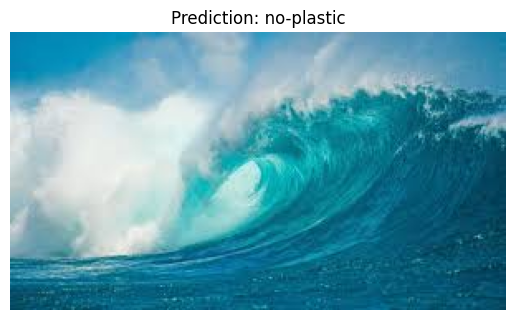

Email successfully sent!


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import geocoder  # For getting geolocation data
import cv2  # OpenCV for image processing

# Load the trained model
model = tf.keras.models.load_model('/content/plastic_detection_model.h5')

# Function to predict if the image contains plastic or not
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Ensure it matches the model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image

    # Predict using the model
    prediction = model.predict(img_array)

    # Output the result
    if prediction[0][0] > 0.5:  # Assuming sigmoid activation for binary classification
        result = "plastic"
    else:
        result = "no-plastic"

    return result

# Function to get geolocation (latitude and longitude)
def get_geo_location():
    g = geocoder.ip('me')
    if g.ok:
        return g.latlng
    return None

# Function to send an email notification with attachment and geolocation
def send_email(prediction_result, img_path, edge_img_path=None):
    from_email = 'sixaxisstar@gmail.com'
    to_email = 'muthukumarg565@gmail.com'
    password = 'rfko cizl gxdx uyux'

    # Create the email content
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = f"Plastic Detection - {prediction_result.capitalize()} Found"

    # Get geolocation data
    geo_location = get_geo_location()
    if geo_location:
        latitude, longitude = geo_location
        location_info = f"\nLocation: Latitude: {latitude}, Longitude: {longitude}"
    else:
        location_info = "\nLocation: Unable to determine"

    # Add the prediction result and geolocation to the email body
    body = f"The prediction result for the provided image is: {prediction_result}.{location_info}"
    msg.attach(MIMEText(body, 'plain'))

    # Attach the original image to the email
    with open(img_path, 'rb') as f:
        mime = MIMEBase('image', 'jpeg', filename=img_path)
        mime.add_header('Content-Disposition', 'attachment', filename=img_path)
        mime.set_payload(f.read())
        encoders.encode_base64(mime)
        msg.attach(mime)

    # Attach the edge-detected image if it exists
    if edge_img_path:
        with open(edge_img_path, 'rb') as f:
            edge_mime = MIMEBase('image', 'jpeg', filename=edge_img_path)
            edge_mime.add_header('Content-Disposition', 'attachment', filename=edge_img_path)
            edge_mime.set_payload(f.read())
            encoders.encode_base64(edge_mime)
            msg.attach(edge_mime)

    try:
        # Establish a secure session with Gmail's outgoing SMTP server
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(from_email, password)

        # Send the email
        text = msg.as_string()
        server.sendmail(from_email, to_email, text)

        # Terminate the SMTP session and close the connection
        server.quit()

        print("Email successfully sent!")
    except Exception as e:
        print(f"Failed to send email: {str(e)}")

# Function to detect edges in the image
def detect_edges(img_path):
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    edges = cv2.Canny(img_gray, 100, 200)  # Apply Canny edge detection

    # Save the edge-detected image
    edge_img_path = img_path.replace('.jpeg', '_edges.jpeg')  # Create a new filename
    cv2.imwrite(edge_img_path, edges)

    return edge_img_path

# Example usage:
img_path = '/content/download.jpeg'
result = predict_image(img_path)

# Display the image along with the prediction result
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')  # Hide axes
plt.show()

# If plastic is detected, process for edge detection
edge_img_path = None
if result == "plastic":
    edge_img_path = detect_edges(img_path)

# Send the email notification with the image, geolocation, and edges (if applicable)
send_email(result, img_path, edge_img_path)

if edge_img_path:
    img = image.load_img(edge_img_path)
    plt.imshow(img)
    plt.title(f"Edges of plastics")
    plt.axis('off')  # Hide axes
    plt.show()